In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [2]:
import numpy as np
model_inference = np.load(f"/home/luca/Documents/Project/model_fc_2l_64_inference_test.npy").astype(np.float32)
print(model_inference)

[7.6900e+02 1.9230e+03 5.0000e+00 7.0000e+00 1.2000e+01 1.9000e+01
 3.1000e+01 1.8978e+04 7.5950e+03 3.0000e+04 4.9000e+01 3.0800e+02
 1.2160e+03 1.9400e+02 4.8050e+03 7.7000e+01 3.0390e+03 4.8600e+02
 1.2006e+04 1.2300e+02]


In [24]:
batch_sizes = np.array([769, 1923, 5, 7, 12, 19, 31, 18978, 7595, 30000, 49, 308, 1216, 194, 4805, 77, 3039, 486, 12006, 123])

times_mean = np.array([0.007677785281477304, 0.019156209353742928, 0.00013287314053239493, 0.00013210855681320717, 0.00019671177041941676, 0.0002615862879259833, 0.00032557290175865434, 0.18705333982195174, 0.07587956560069117, 0.2958046793937683, 0.00045626738975787983, 0.003097353310420595, 0.011836972729913119, 0.0019265536604256466, 0.04769077794305209, 0.0007281878898883688, 0.030244259998716157, 0.004822509042147933, 0.11843038641888162, 0.001165677761209422])

times_std = np.array([7.759736315090305e-05, 0.00010405759570552093, 8.458873983110743e-06, 4.9985012207374305e-06, 6.894388189962724e-06, 1.765864052775149e-05, 4.999380080479019e-06, 0.0005859777339317113, 0.00012086133766308785, 0.001226229161803122, 2.102338359146173e-05, 3.502907890120854e-05, 6.515365527023383e-05, 3.287408488787408e-05, 0.00010073614585713229, 2.113949114485798e-05, 7.115829964020621e-05, 4.977723371075641e-05, 0.000860920644463081, 2.6712669738069397e-05])

time_1_inf = np.zeros_like(times_mean)
std = np.zeros_like(times_mean)

for i, b in enumerate(batch_sizes):
    time_1_inf[i] = times_mean[i]/b
    std[i] = times_std[i]/b

print(1/time_1_inf.mean(), std.mean())



85691.88092051455 2.894886475866961e-07


(0.0, 0.0008)

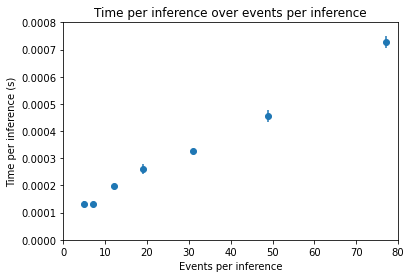

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)

#ax.set_xscale("log")
#ax.set_yscale("log")

ax.errorbar(batch_sizes, times_mean, fmt="o", yerr=times_std)

ax.set(title='Time per inference over events per inference')
ax.set(xlabel="Events per inference")
ax.set(ylabel="Time per inference (s)")
ax.set_xlim(0, 80)
ax.set_ylim(0, 0.0008)
# plt.xlabel("Batch size")
# plt.ylabel("Time")
#plt.savefig(f"{plots_dir}/{model_name}_inference_test.png")


In [10]:

#noise = np.load(f"/home/luca/Documents/Project/data/testing_data.npy").astype(np.float32)
print(noise[:600000, :, :].shape)
np.save('/home/luca/Documents/Project/data/testing_data_300k',noise[:300000, :, :])

(600000, 256, 1)


In [4]:
x = np.vstack((noise, signal))  # shape is (200000, 4, 256)

x2 = np.swapaxes(x, 1, 2)  # (200000, 256, 1)
n_samples = x2.shape[1]
n_channels = x2.shape[2]
x_1D = np.reshape(x, (x.shape[0], -1))  # shape is (200000, 256)
x3 = np.expand_dims(x2, axis=-1)       #input for conv layer

In [5]:
# define labels with one hot encoding, (1,0) -> noise, (0,1) -> signal
y = np.zeros((200000, 2))
y[:100000, 0] = 1
y[100000:, 1] = 1

In [6]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_1D, y, random_state = 30)

In [7]:
BATCH_SIZE = 32
EPOCHS = 50
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=1)]

In [8]:
#Fully connected network
#model_fc_1l_64  = keras.Sequential(
 #   [
  #      Dense(64, activation="relu", name="layer1", input_dim=x_1D.shape[-1]),
        #Dense(64, activation="relu", name="layer2"),
        #Dense(64, activation="relu", name="layer3"),
        #Dense(64, activation="relu", name="layer4"),
   #     Dense(n_classes, activation="softmax", name="layer5"),
    #]
#)

In [9]:
#1D - Convolutional Network
#model_conv1D_2l_10_10_test = Sequential(
 #   [
  #      Conv1D(10, 10, activation='relu', name="layer1", input_shape=(n_samples, n_channels)), # n_filters, n_width
   #     Conv1D(10, 10, activation='relu', name="layer2"), # n_filters, n_width
        #Conv1D(10, 10, activation='relu', name="layer3"),
        #Conv1D(10, 10, activation='relu', name="layer4"),
    #    Dropout(0.5, name="layer5"),
        #MaxPooling1D(pool_size=(3)),
     #   Flatten(name="layer6"),
      #  Dense(n_classes, activation='softmax', name="layer7")
    #]
#)

In [11]:
print(X_train.shape)

(150000, 256)


In [ ]:
model = model_fc_1l_64
model_name = 'model_fc_1l_64'

# train the network
model.compile(optimizer='Adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])

print(model_name)
print(model.summary())

model.fit(X_train,y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          callbacks=callbacks_list,
          validation_split=0.2,
          verbose=1)
model.save(f'/models/'+model_name+'.h5')

In [13]:
#########################
###second part of code###
#########################

#model prediction + efficiency curve

#model_name = 'model_fc_1l_64'
#model = keras.models.load_model(f'/content/drive/My Drive/NN/'+model_name+'.h5', compile=False)
y_pred = model.predict(X_test) #X_test, or np.reshape(X_test, (X_test.shape[0], -1))

In [14]:
print(y_pred)

[[1.0000000e+00 5.7112349e-08]
 [9.9999619e-01 3.8326857e-06]
 [7.2845622e-20 1.0000000e+00]
 ...
 [9.9999416e-01 5.8556566e-06]
 [1.0000000e+00 7.3703865e-09]
 [9.9999881e-01 1.1627966e-06]]


In [64]:
tot_n = int(y_test[:,0].sum())
tot_s = int(y_test[:,1].sum())

s_should = []
n_should  = []

for i in range(len(y_pred[:,0])):
  if y_test[i,1] == 1:
    s_should.append(y_pred[i,1])

  else:
    n_should.append(y_pred[i,0])

yy = np.log10(np.linspace(10 ** 0.001, 10 ** 0.99999, 1000))
n = np.zeros_like(yy)
s = np.zeros_like(yy)

In [72]:
print(tot_n)

25076


In [82]:
for iT, threshold in enumerate(yy):
    eff_signal = np.sum((s_should > threshold) == True) / tot_s
    s[iT] = eff_signal
    eff_noise = np.sum((n_should > threshold) == False) / tot_n
    
    if eff_noise < 1:
        reduction_factor = np.log10(1 / (1 - eff_noise))
    else:
        reduction_factor = np.log10(1000000)
    n[iT] = 10 ** reduction_factor

In [ ]:
print(s, n)

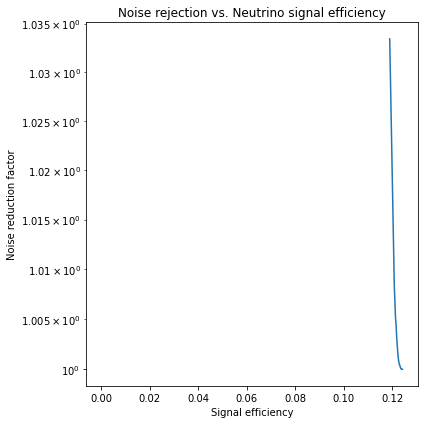

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(s, n)
#plt.xlim(0.95, 1)
#plt.ylim(0, 1.36)
ax.set_xlabel("Signal efficiency")
ax.set_ylabel("Noise reduction factor")
ax.semilogy(True)
ax.set_title("Noise rejection vs. Neutrino signal efficiency")
fig.tight_layout()
#fig.savefig("/content/drive/My Drive/NN/efficiency_curve_"+model_name+".png")
plt.show()